In [1]:
from google.colab import files

uploaded = files.upload()  # Opens a file selection dialog


Saving kaggle.json to kaggle.json


In [2]:
import os
import shutil

# Create .kaggle folder if not exists
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json to the correct directory
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set proper permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [4]:

!pip install kaggle
!pip install keras
!pip install tensorflow


## Importing The Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image as img
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.utils import model_to_dot

import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [6]:
tf.__version__

'2.18.0'

In [7]:
cv2.__version__

'4.11.0'

# Analising the Data

In [8]:
X = []
y = []
IMG_SIZE = 150
DIR = "/content/seg_train/seg_train"
folders = os.listdir(DIR)
folders

['sea', 'street', 'mountain', 'glacier', 'buildings', 'forest']

In [9]:
for i, file in enumerate(folders):
    filename = os.path.join(DIR, file)
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            y.append(i)
    except:
        print("File {} not read".format(path))

    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, i))

Folder sea started
Folder sea done
The folder sea is labeled as 0
Folder street started
Folder street done
The folder street is labeled as 1
Folder mountain started
Folder mountain done
The folder mountain is labeled as 2
Folder glacier started
Folder glacier done
The folder glacier is labeled as 3
Folder buildings started
Folder buildings done
The folder buildings is labeled as 4
Folder forest started
Folder forest done
The folder forest is labeled as 5


In [10]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([2274, 2382, 2512, 2404, 2191, 2271]))

### Making the functions to get the training and validation set from the Images

In [11]:
from tqdm import tqdm
X=[]
Z=[]

IMG_SIZE=150
IMAGE_BUILDINGS_DIR='/content/seg_train/seg_train/buildings'
IMAGE_FOREST_DIR='/content/seg_train/seg_train/forest'
IMAGE_GLACIER_DIR='/content/seg_train/seg_train/glacier'
IMAGE_MOUNTAIN_DIR='/content/seg_train/seg_train/mountain'
IMAGE_SEA_DIR='/content/seg_train/seg_train/sea'
IMAGE_STREET_DIR='/content/seg_train/seg_train/street'

In [12]:
def assign_label(img,image_type):
    return image_type

In [13]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(__builtins__.str(label))

In [14]:
make_train_data('Buildings',IMAGE_BUILDINGS_DIR)
print(len(X))

100%|██████████| 2191/2191 [00:01<00:00, 1543.45it/s]

2191


In [15]:
make_train_data('Forest',IMAGE_FOREST_DIR)
print(len(X))

100%|██████████| 2271/2271 [00:01<00:00, 1415.67it/s]

4462


In [16]:
make_train_data('Glacier',IMAGE_GLACIER_DIR)
print(len(X))

100%|██████████| 2404/2404 [00:01<00:00, 1711.47it/s]

6866


In [17]:
make_train_data('Mountain',IMAGE_MOUNTAIN_DIR)
print(len(X))

100%|██████████| 2512/2512 [00:01<00:00, 1371.85it/s]

9378


In [18]:
make_train_data('Sea',IMAGE_SEA_DIR)
print(len(X))

100%|██████████| 2274/2274 [00:02<00:00, 787.40it/s]

11652


In [19]:
make_train_data('Street',IMAGE_STREET_DIR)
print(len(X))

100%|██████████| 2382/2382 [00:01<00:00, 1381.12it/s]

14034


In [20]:
import os
from IPython.display import display
from PIL import Image

labels = []
dic = dict()

DIR = '/content/seg_train/seg_train' # Ensure this is the correct path
dirs = os.listdir(DIR)  # Get class names (subfolders)

for i in range(min(6, len(dirs))):  # Prevent out-of-range error
    path = os.path.join(DIR, dirs[i])  # Correct path handling
    count = 0

    for j in os.listdir(path):  # Iterate over images
        img_path = os.path.join(path, j)  # Full path of the image
        im = Image.open(img_path)  # Open image
        count += 1
        labels.append(j)  # Store file name

    dic[dirs[i]] = count  # Store image count for each class

print(dic)  # Print class-wise image count


{'sea': 2274, 'street': 2382, 'mountain': 2512, 'glacier': 2404, 'buildings': 2191, 'forest': 2271}


In [21]:
import os
from IPython.display import display
from PIL import Image

labels1 = []
dic1 = dict()
IMAGE_SIZE = (64,64)
DIRS= '/content/seg_test/seg_test' # Ensure this is the correct path
dirs1= os.listdir(DIRS)  # Get class names (subfolders)

for i in range(min(6, len(dirs1))):  # Prevent out-of-range error
    path = os.path.join(DIRS, dirs1[i])  # Correct path handling
    count = 0

    for j in os.listdir(path):  # Iterate over images
        img_path = os.path.join(path, j)  # Full path of the image
        im = Image.open(img_path)  # Open image
        count += 1
        labels1.append(j)  # Store file name

    dic1[dirs1[i]] = count  # Store image count for each class

print(dic1)  # Print class-wise image count


{'sea': 510, 'street': 501, 'mountain': 525, 'glacier': 553, 'buildings': 437, 'forest': 474}


In [22]:
print ("Number of training examples: {}".format(len(labels)))
print ("Number of testing examples: {}".format(len(labels1)))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (64, 64)


In [23]:
lis1 = []
lis2 = []
for key,val in dic.items():
    lis1.append(val)
    lis2.append(key)

In [24]:
lis11 = []
lis22 = []
for key,val in dic1.items():
    lis11.append(val)
    lis22.append(key)

In [25]:
data = {'Name':lis2, 'train':lis1,'test':lis11}
data

{'Name': ['sea', 'street', 'mountain', 'glacier', 'buildings', 'forest'],
 'train': [2274, 2382, 2512, 2404, 2191, 2271],
 'test': [510, 501, 525, 553, 437, 474]}

In [26]:
import pandas as pd
df = pd.DataFrame(data)
df

,Name,train,test
0,sea,2274,510
1,street,2382,501
2,mountain,2512,525
3,glacier,2404,553
4,buildings,2191,437
5,forest,2271,474


## 2.2 ) Visualizing some Random Images

Text(0.5, 1.0, 'Training sets Input')

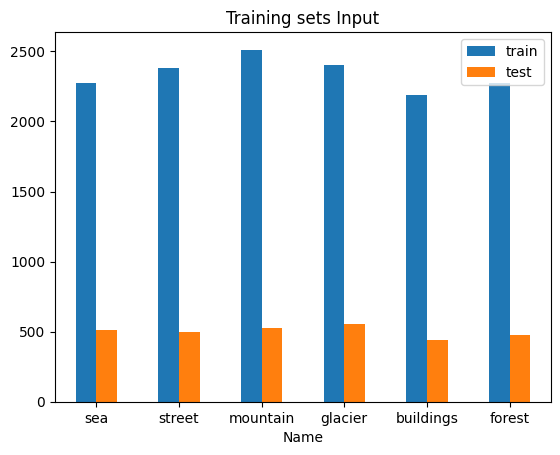

In [27]:
ax = df.plot.bar(x='Name', y=['train','test'], rot=0)
plt.title('Training sets Input')

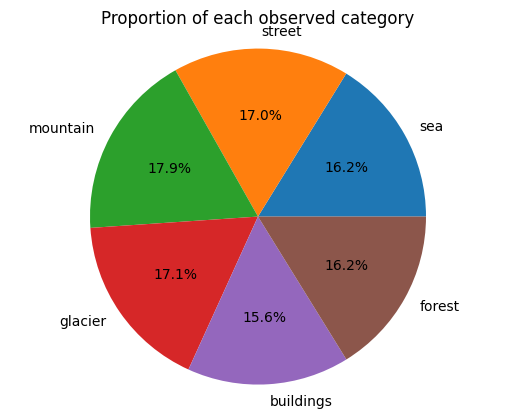

In [28]:
plt.pie(lis1,
        explode=(0, 0, 0, 0, 0, 0) ,
        labels=lis2,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

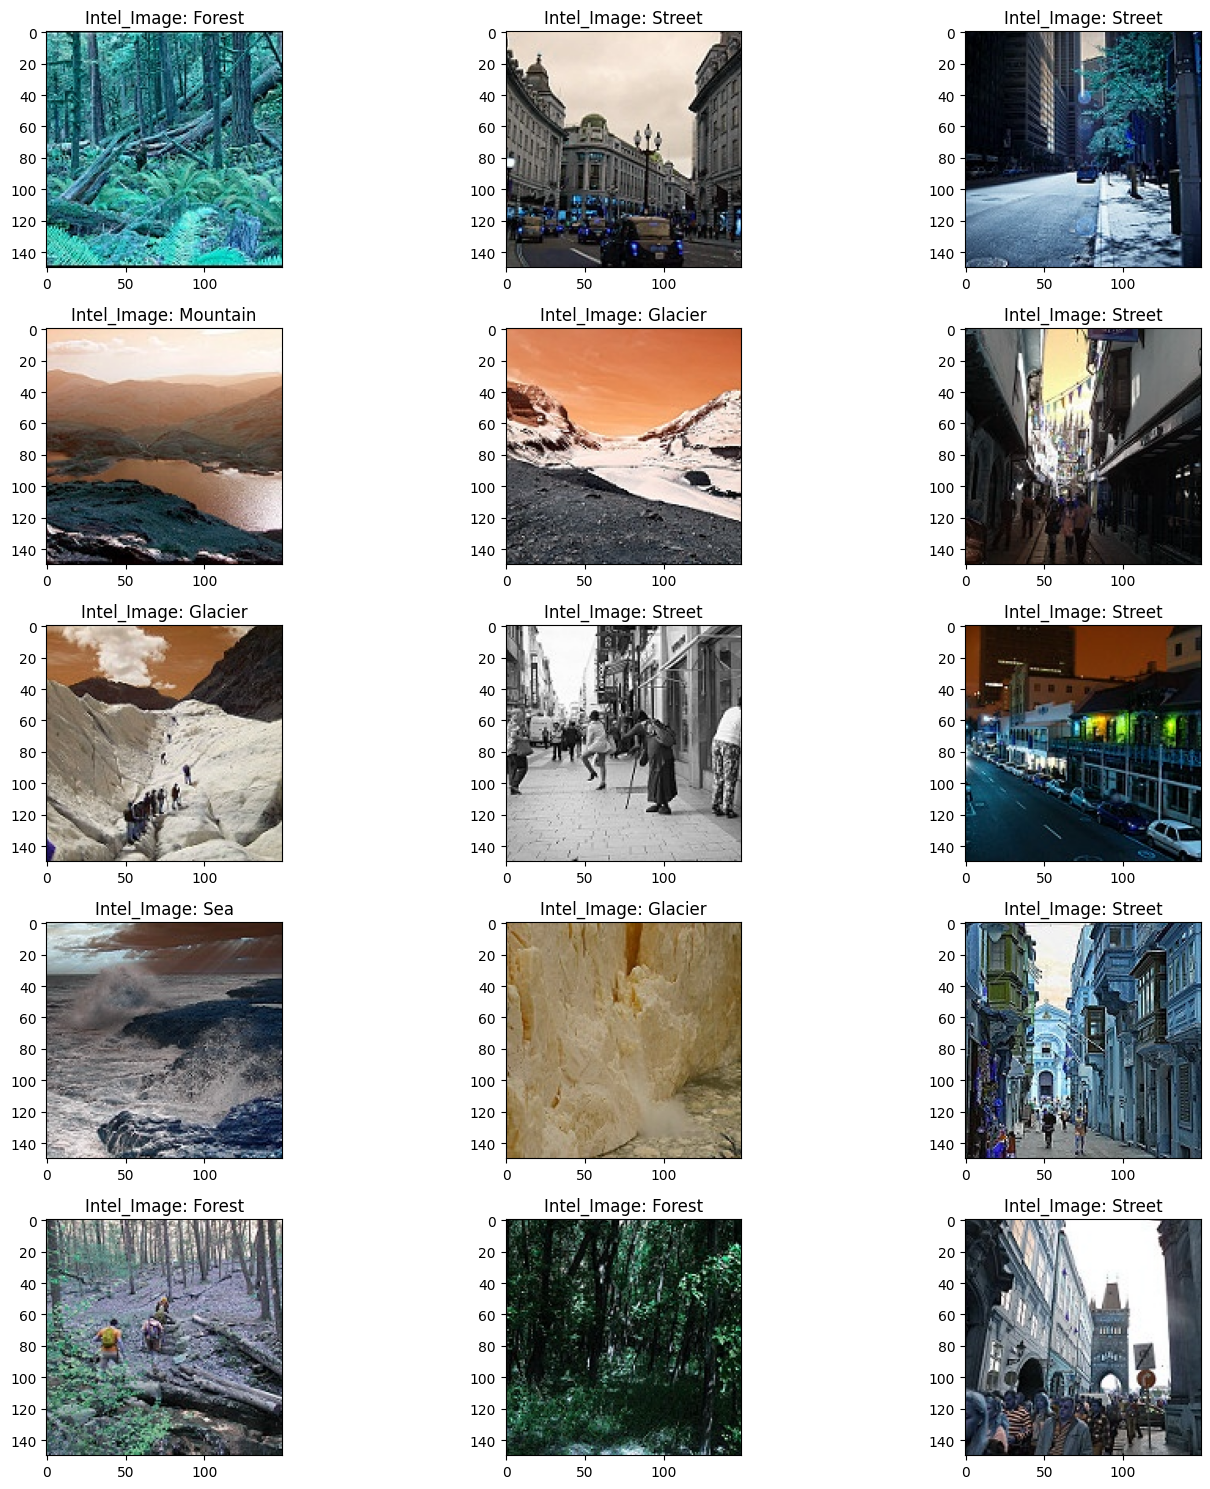

In [29]:
import random as rn
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Intel_Image: '+Z[l])

plt.tight_layout()

### Preprocessing the Training set

In [30]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
seg_train = train_datagen.flow_from_directory('/content/seg_train/seg_train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                              color_mode="grayscale",
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


### Preprocessing the Test set

In [31]:
test_datagen = ImageDataGenerator(rescale = 1./255)
seg_test = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            color_mode="grayscale",
                                            class_mode = 'categorical')
IMAGE_SIZE = (256,256)

Found 3000 images belonging to 6 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [32]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256, 256, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [34]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [36]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [37]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [38]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [39]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,755,494 (60.10 MB)

 Trainable params: 15,755,494 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

## Part 3 - Training the CNN

### Compiling the CNN

In [40]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [41]:
trained= cnn.fit(x = seg_train, validation_data = seg_test, epochs = 15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 89s 189ms/step - accuracy: 0.4780 - loss: 1.6861 - val_accuracy: 0.6613 - val_loss: 0.8969
Epoch 2/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 78s 178ms/step - accuracy: 0.6768 - loss: 0.8545 - val_accuracy: 0.6720 - val_loss: 0.9499
Epoch 3/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 181ms/step - accuracy: 0.7245 - loss: 0.7398 - val_accuracy: 0.7263 - val_loss: 0.7443
Epoch 4/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 79s 179ms/step - accuracy: 0.7618 - loss: 0.6501 - val_accuracy: 0.7523 - val_loss: 0.6902
Epoch 5/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 81s 177ms/step - accuracy: 0.7746 - loss: 0.6175 - val_accuracy: 0.7117 - val_loss: 0.8001
Epoch 6/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 79s 180ms/step - accuracy: 0.7833 - loss: 0.5965 - val_accuracy: 0.7813 - val_loss: 0.6036
Epoch 7/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 182ms/step - accuracy: 0.8057 - loss: 0.5420 - val_accuracy: 0.7817 - val_loss: 0.6127
Epoch 8/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 80s 182ms/step - accuracy: 0.8083 - loss: 0

## Evaluating the Model Performance

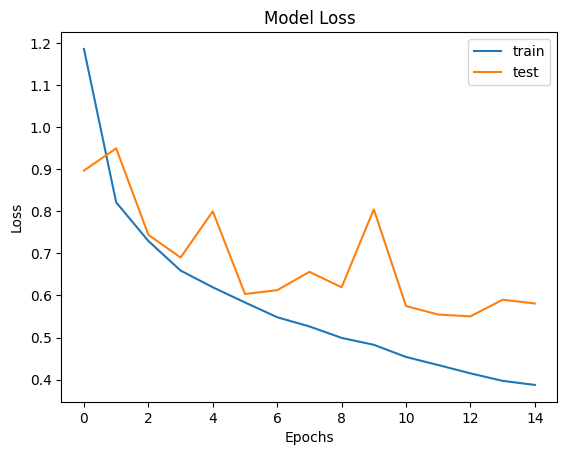

In [42]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

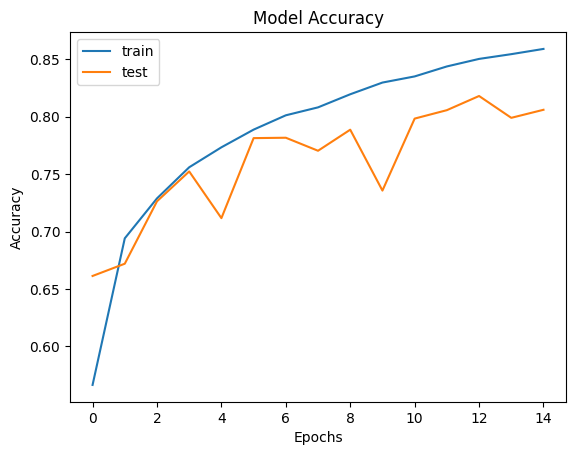

In [43]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

##  Predicting single image and visualizing it

In [77]:
import numpy as np
from keras.preprocessing import image

# Load the image with color mode 'rgb'
test_image1 = image.load_img('/content/seg_pred/seg_pred/5.jpg', target_size=(200, 200), color_mode='rgb') # Changed to color_mode='rgb' and target_size=(200, 200)

# Convert the image to a numpy array
test_image = image.img_to_array(test_image1)

# Expand the dimensions to add a batch size (model expects a batch of images)
test_image = np.expand_dims(test_image, axis=0)

# Predict the result using the trained CNN model
result = cnn.predict(test_image)

# Make the prediction based on the model output
if result[0][0] == 1:
    prediction = 'Building'
elif result[0][1] == 1:
    prediction = 'Forest'
elif result[0][2] == 1:
    prediction = 'Glacier'
elif result[0][3] == 1:
    prediction = 'Mountain'
elif result[0][4] == 1:
    prediction = 'Sea'
elif result[0][5] == 1:
    prediction = 'Street'
else:
    print("Error")

print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: Street


In [78]:
result

array([[4.8984e-41, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]], dtype=float32)

In [79]:
print(prediction)

Street


Text(0.5, 1.0, 'Image')

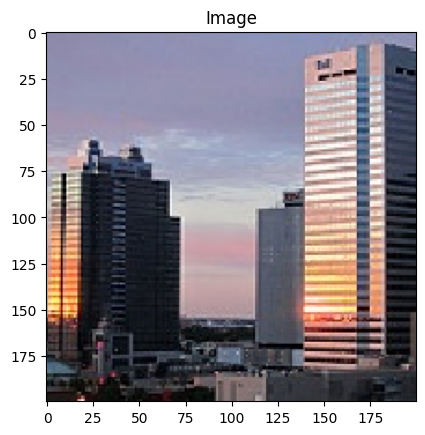

In [80]:
from IPython.display import display
from PIL import Image
display(plt.imshow(test_image1))
plt.title("Image")

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


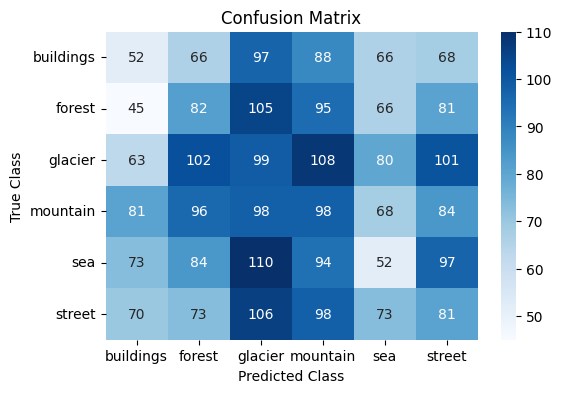

False Positive Rate (Type I Error): [0.86458333 0.83697813 0.83902439 0.8313253  0.87160494 0.84179688]
False Negative Rate (Type II Error): [0.88100686 0.82700422 0.82097649 0.81333333 0.89803922 0.83832335]
Z-Score: 0.3130345606652339, P-Value: 0.3771272025445885
T-Statistic: 0.3449312112597252, P-Value: 0.7301581800743062
F-Statistic: 0.118977540501097, P-Value: 0.7301581800741445


In [45]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

In [47]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_probs = cnn.predict(seg_test)  # Assuming seg_test is a dataset
y_true = seg_test.labels  # Extracting true labels

# Convert probabilities to class labels (assuming multi-class)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = y_true # Assuming y_true already contains the class labels  # Convert one-hot to labels


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step


In [48]:
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.16      0.14      0.15       437
           1       0.17      0.18      0.18       474
           2       0.16      0.18      0.17       553
           3       0.16      0.18      0.17       525
           4       0.15      0.12      0.14       510
           5       0.16      0.17      0.17       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



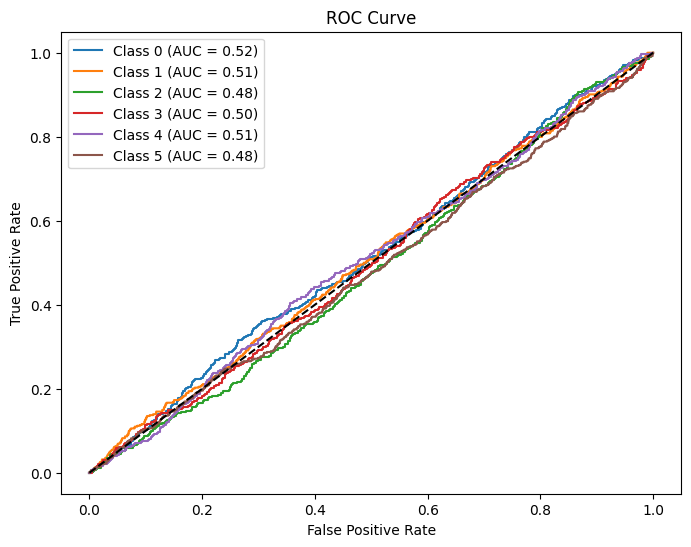

In [49]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_true_classes, classes=np.arange(len(seg_train.class_indices)))

plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


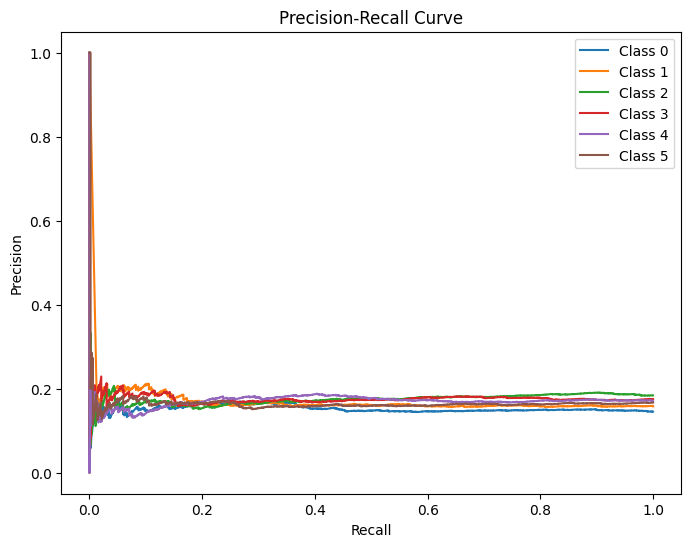

In [50]:
plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
seg_train = train_datagen.flow_from_directory('/content/seg_train/seg_train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                               color_mode="rgb",
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [52]:
test_datagen = ImageDataGenerator(rescale = 1./255)
seg_test = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                             color_mode="rgb",
                                            class_mode = 'categorical')
IMAGE_SIZE = (200,200)


Found 3000 images belonging to 6 classes.


In [53]:
cnn = tf.keras.models.Sequential()

In [54]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[200, 200, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [56]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [57]:
cnn.add(tf.keras.layers.Flatten())

In [58]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [59]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [60]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 97, 97, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,448,230 (36.04 MB)

 Trainable params: 9,448,230 (36.04 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [62]:
trained= cnn.fit(x = seg_train, validation_data = seg_test, epochs = 15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 137s 303ms/step - accuracy: 0.4590 - loss: 1.5398 - val_accuracy: 0.6810 - val_loss: 0.8465
Epoch 2/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 126s 287ms/step - accuracy: 0.6931 - loss: 0.8153 - val_accuracy: 0.7373 - val_loss: 0.7200
Epoch 3/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 128s 292ms/step - accuracy: 0.7385 - loss: 0.7126 - val_accuracy: 0.7567 - val_loss: 0.6715
Epoch 4/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 142s 291ms/step - accuracy: 0.7889 - loss: 0.5883 - val_accuracy: 0.7663 - val_loss: 0.6402
Epoch 5/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 127s 289ms/step - accuracy: 0.7999 - loss: 0.5500 - val_accuracy: 0.7817 - val_loss: 0.6281
Epoch 6/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 127s 288ms/step - accuracy: 0.8246 - loss: 0.4788 - val_accuracy: 0.7927 - val_loss: 0.6028
Epoch 7/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 127s 290ms/step - accuracy: 0.8306 - loss: 0.4546 - val_accuracy: 0.8257 - val_loss: 0.5063
Epoch 8/15
439/439 ━━━━━━━━━━━━━━━━━━━━ 130s 295ms/step - accuracy: 0.8459 -

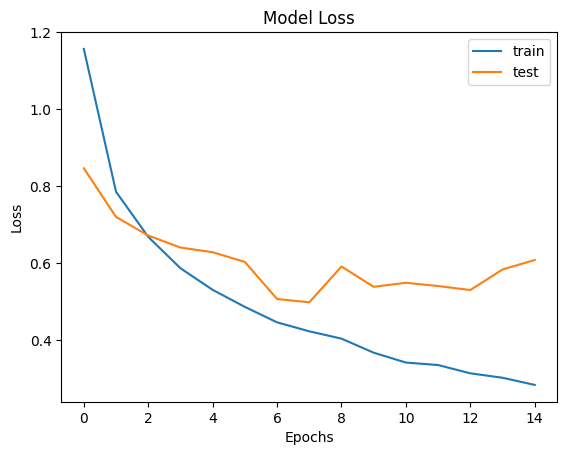

In [63]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

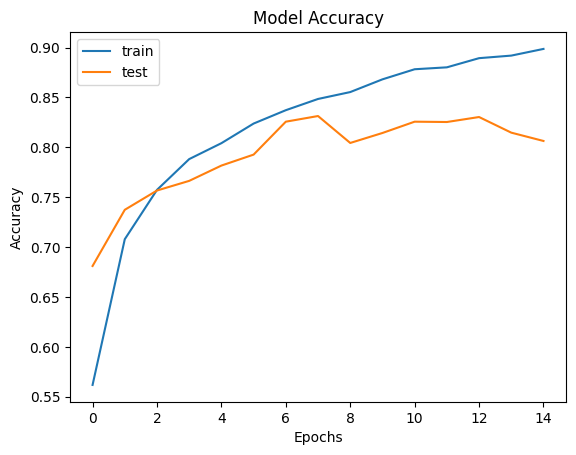

In [64]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [65]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('/content/seg_pred/seg_pred/5.jpg', target_size = (200, 200))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Building'
elif result[0][1] == 1:
  prediction = 'Forest'
elif result[0][2] == 1:
  prediction = 'Glacier'
elif result[0][3] == 1:
  prediction = 'Mountain'
elif result[0][4] == 1:
  prediction = 'Sea'
elif result[0][5] == 1:
  prediction = 'Street'
else:
    print("Error")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


In [66]:
result

array([[4.8984e-41, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]], dtype=float32)

In [67]:
print(prediction)

Street


Text(0.5, 1.0, 'Image')

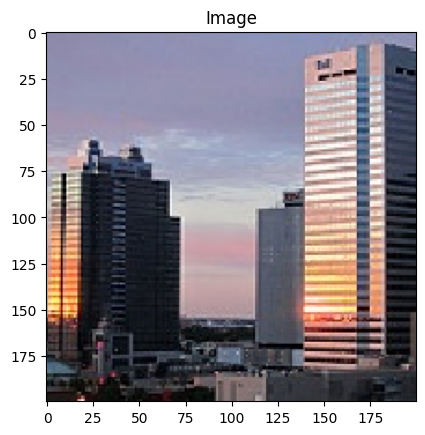

In [75]:
from IPython.display import display
from PIL import Image
display(plt.imshow(test_image1))
plt.title("Image")

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step


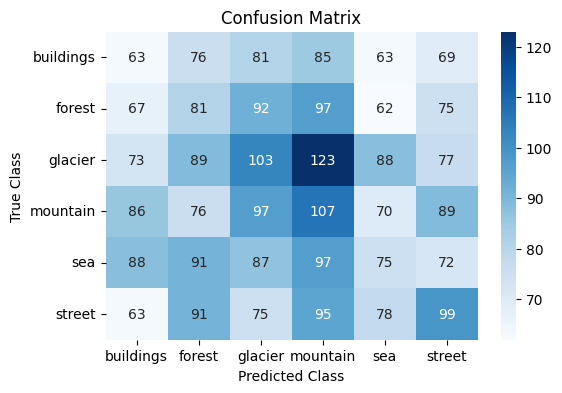

False Positive Rate (Type I Error): [0.85681818 0.83928571 0.80747664 0.82284768 0.82798165 0.79417879]
False Negative Rate (Type II Error): [0.85583524 0.82911392 0.81374322 0.79619048 0.85294118 0.80239521]
Z-Score: 1.1698779858563126, P-Value: 0.12102503707155654
T-Statistic: 1.2847663644219778, P-Value: 0.19892355281467053
F-Statistic: 1.6506246111500493, P-Value: 0.19892355281471844


In [69]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = cnn.predict(seg_test, steps=len(seg_test))
y_pred_classes = np.argmax(y_pred, axis=1)  # Getting the predicted classes

# Ground truth labels
y_true = seg_test.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=seg_test.class_indices.keys(), yticklabels=seg_test.class_indices.keys())
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
# Type I Error (False Positive):
# (Predicted positive, but actual negative)

false_positive = cm.sum(axis=0) - np.diagonal(cm)
false_positive_rate = false_positive / cm.sum(axis=0)
print(f"False Positive Rate (Type I Error): {false_positive_rate}")
# Type II Error (False Negative):
# (Predicted negative, but actual positive)

false_negative = cm.sum(axis=1) - np.diagonal(cm)
false_negative_rate = false_negative / cm.sum(axis=1)
print(f"False Negative Rate (Type II Error): {false_negative_rate}")
from scipy.stats import norm

# Example data: Sample mean for the two datasets
mean1 = np.mean(y_true)  # True classes
mean2 = np.mean(y_pred_classes)  # Predicted classes
std1 = np.std(y_true)
std2 = np.std(y_pred_classes)

# Sample size
n1 = len(y_true)
n2 = len(y_pred_classes)

# Z-test formula
z_score = (mean1 - mean2) / np.sqrt((std1*2 / n1) + (std2*2 / n2))

# p-value from the Z-score
p_value = norm.sf(abs(z_score))  # One-tailed test

print(f"Z-Score: {z_score}, P-Value: {p_value}")
from scipy.stats import ttest_ind

# Example data: Two sample groups (true classes vs predicted classes)
t_stat, p_value = ttest_ind(y_true, y_pred_classes)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
from scipy.stats import f_oneway

# Assume you have multiple sets of predictions, here for demonstration we use two sets
group1 = y_true  # True labels
group2 = y_pred_classes  # Predicted labels

# One-way ANOVA test
f_stat, p_val = f_oneway(group1, group2)

print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

In [71]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_probs = cnn.predict(seg_test)  # Assuming seg_test is a dataset
y_true = seg_test.labels  # Extracting true labels

# Convert probabilities to class labels (assuming multi-class)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = y_true # Convert one-hot to labels)  # Convert one-hot to labels


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step


In [72]:
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.14      0.14      0.14       437
           1       0.14      0.15      0.14       474
           2       0.16      0.15      0.15       553
           3       0.17      0.20      0.18       525
           4       0.19      0.16      0.17       510
           5       0.18      0.17      0.17       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



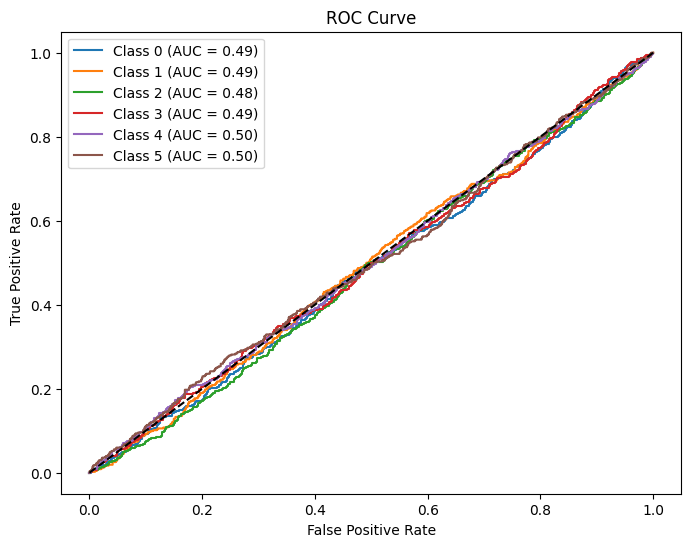

In [73]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the labels for multi-class ROC
y_true_bin = label_binarize(y_true_classes, classes=np.arange(len(seg_train.class_indices)))

plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


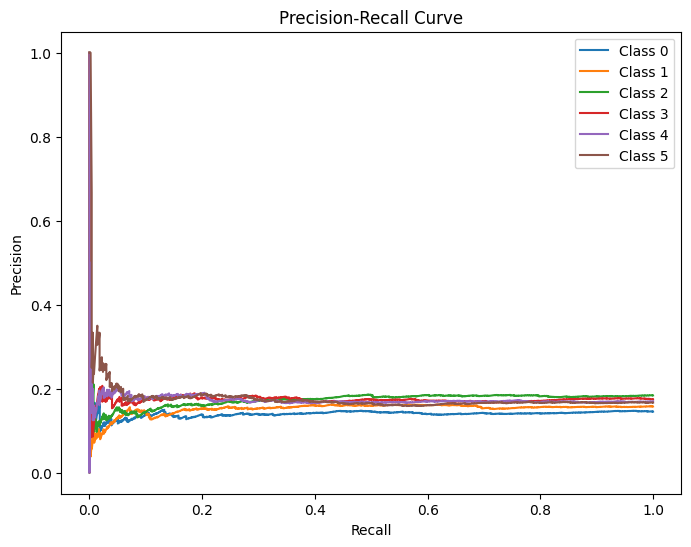

In [74]:
plt.figure(figsize=(8, 6))
for i in range(y_true_bin.shape[1]):  # Loop over each class
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
